# DCMIP test case 4 demo - 2
-------

Here, the ability of the dynamical core to simulate waves generated by baroclinic
instability is tested.

The main aim here is to see that the solution converges as the resolution of the model
increases (Jablonowski and Williamson (2006)).

Jablonowski's group provides a fortran file which generates the initial conditions
to test any dynamical core. We have written a Cython wrapper around it, and use it to
start the simulation.

Using netCDF4 interface for IO
Lats, lons, levs, trunc, dims, tracers 94 192 28 62 2016 1


<IPython.core.display.Javascript object>


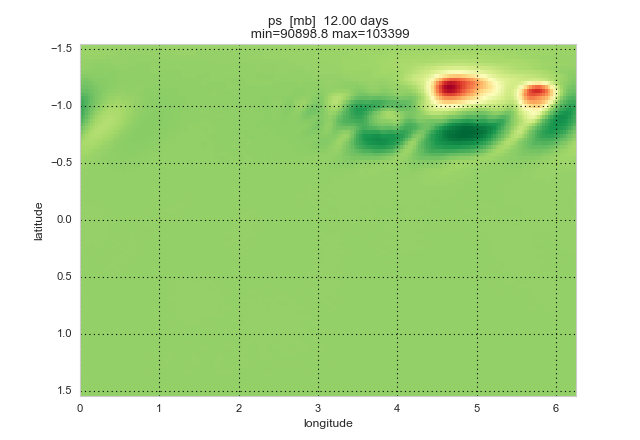

In [1]:
%matplotlib notebook

from dynamics import dynamics
from dcmip import getBaroclinicWaveICs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid',rc={'grid.linestyle':'dotted', 'grid.color':'0.0'})
# Dynamical core parameters

kwargs = {}
kwargs['dt'] = 1200
kwargs['nlon'] = 192
kwargs['nlat'] = 94
kwargs['MonitorFields'] = ['ps'] # Display zonal velocity during simulation
kwargs['MonitorFreq'] = 6.*3600 #6 hourly update

#Init the dynamics Component
dycore = dynamics(scheme='gfs', **kwargs)

#Get the pressure and lat/lon values; this is needed
#to generate the initial conditions
pressure = dycore['p']
ps = dycore['ps']

full_latitudes = dycore.Extension.latitudes
full_longitudes = dycore.Extension.longitudes

#Get new initial conditions
u,v,t, phis = getBaroclinicWaveICs(pressure, full_longitudes, full_latitudes, perturb=True)

#Initialise model topography
dycore.Extension.set_topography(phis)

#Initialise winds, surface pressure and temperature
dycore.Extension.initial_conditions(u,v,t,ps)

#Run the code for 10 days. each time step is 1200 seconds = 1/3 hour
num_steps = 12*24*3

for i in range(num_steps):
    #Go ahead one time step
    dycore.step()
    
ps = dycore['ps']

#np.save('t128ps.npy',ps)
#np.save('t128lat.npy',full_latitudes)
#np.save('t128lon.npy',full_longitudes)
# Delete reference to deallocate fortran data
del(dycore)